In [13]:
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

rc('font', family='Malgun Gothic')
plt.style.use('ggplot')

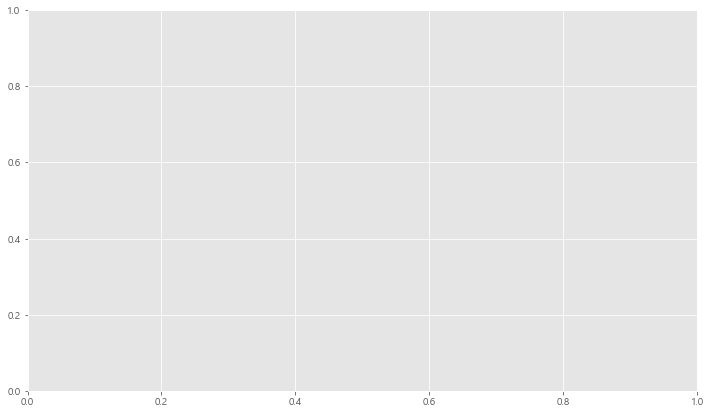

In [14]:
fig, ax = plt.subplots(figsize=(12,7))

ax

In [15]:
titanic_df = pd.read_csv('train.csv', encoding='utf-8')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
# 결측치 너무 많은 행은 삭제
del titanic_df['Cabin']

In [18]:
# 큰 의미를 갖고있지 않은 일련번호 삭제
del titanic_df['PassengerId'] 

In [19]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## 상관관계 분석
- 판다스데이터프레임.corr()
- annot 은 annotation. 각 셀의 값을 표시할지 결정하는 것
- fmt 는  annot=True 인 경우에, 숫자 표시를 어떻게 할지
- cmap 은 색상을 어떻게 할지

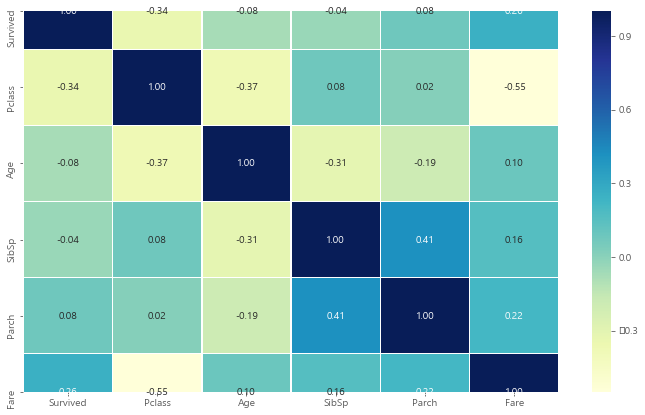

In [59]:
# 상관관계 분석
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(data = titanic_df.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='YlGnBu')

## Pclass 칼럼 분석

In [20]:
# Pclass 라벨 개수
print(set(titanic_df['Pclass']))

{1, 2, 3}


In [37]:
def bar_chart(feature, ax=None): # feature <- 열 이름, ax <- subplot 객체 
    survived = titanic_df[titanic_df['Survived']==1][feature].value_counts()
    dead = titanic_df[titanic_df['Survived']==0][feature].value_counts()
    
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    
    df.plot(kind='bar', stacked=True, ax=ax)

[Text(0.5, 1.0, '승선 장소')]

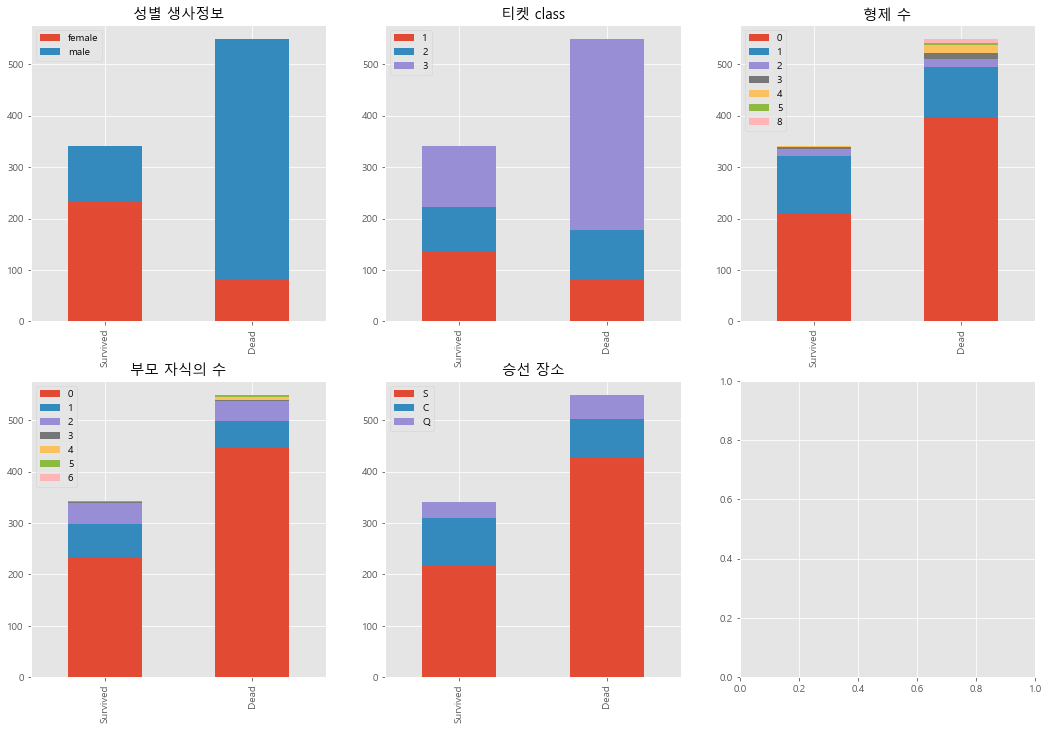

In [38]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,12)

bar_chart('Sex', ax1)
bar_chart('Pclass', ax2)
bar_chart('SibSp', ax3)
bar_chart('Parch', ax4)
bar_chart('Embarked', ax5)

ax1.set(title="성별 생사정보")
ax2.set(title="티켓 class")
ax3.set(title="형제 수")
ax4.set(title="부모 자식의 수")
ax5.set(title="승선 장소")

In [39]:
survived = titanic_df[titanic_df['Survived']==1]['Pclass'].value_counts()
dead = titanic_df[titanic_df['Survived']==0]['Pclass'].value_counts()

df = pd.DataFrame([survived, dead])
df.index = ['Survived', 'Dead']
df

,1,2,3
Survived,136,87,119
Dead,80,97,372


## 성별 칼럼 분석

In [40]:
survived = titanic_df[titanic_df['Survived']==1]['Sex'].value_counts()
dead = titanic_df[titanic_df['Survived']==0]['Sex'].value_counts()

df = pd.DataFrame([survived, dead])
df.index = ['Survived', 'Dead']
df

,female,male
Survived,233,109
Dead,81,468


In [62]:
# (추후 변경해서 다시 진행해보기) Female 이 생존 비율이 훨씬 높으므로 2.5 정도로 가중치를 줄 경우 accuracy가 향상됩니다.
sex_mapping = {"male": 0 , "female":1} 
titanic_df['Sex'] = titanic_df['Sex'].map(sex_mapping)

titanic_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,3
1,1,1,1,38.0,1,0,71.2833,C,4
2,1,3,1,26.0,0,0,7.9250,S,2


## 형제자매 칼럼 분석

In [41]:
# 라벨 개수
print(set(titanic_df['SibSp']))

{0, 1, 2, 3, 4, 5, 8}


In [42]:
survived = titanic_df[titanic_df['Survived']==1]['SibSp'].value_counts()
dead = titanic_df[titanic_df['Survived']==0]['SibSp'].value_counts()

df = pd.DataFrame([survived, dead])
df.index = ['Survived', 'Dead']
df

,0,1,2,3,4,5,8
Survived,210.0,112.0,13.0,4.0,3.0,NaN,NaN
Dead,398.0,97.0,15.0,12.0,15.0,5.0,7.0


## 부모 자식 칼럼분석

In [43]:
# 라벨 개수
print(set(titanic_df['Parch']))

{0, 1, 2, 3, 4, 5, 6}


In [44]:
survived = titanic_df[titanic_df['Survived']==1]['Parch'].value_counts()
dead = titanic_df[titanic_df['Survived']==0]['Parch'].value_counts()

df = pd.DataFrame([survived, dead])
df.index = ['Survived', 'Dead']
df

,0,1,2,3,4,5,6
Survived,233.0,65.0,40.0,3.0,NaN,1.0,NaN
Dead,445.0,53.0,40.0,2.0,4.0,4.0,1.0


In [69]:
# parch, sibsp의 경우 0 or 1이 많음, family 전체 사이즈로 합쳐보기 (본인 포함 탑승한 가족 구성원 수)

titanic_df["FamilySize"] = titanic_df["SibSp"] + titanic_df["Parch"] +1
titanic_df[['FamilySize','Survived']].groupby('FamilySize', as_index=False).mean().sort_values(by='Survived',ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [70]:
# 가족 구성원이 1인 경우 survived 비율이 30% 인데 537 가구로 전체에서 많은 비중을 차지함 
titanic_df["FamilySize"].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [71]:
# 1인 가구인 경우는 1, 아닌 경우는 0으로 'isAlone' column을 추가

titanic_df['isAlone'] = 0
titanic_df.loc[titanic_df['FamilySize'] == 1, 'isAlone'] = 1
titanic_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,isAlone
0,0,3,0,22.0,1,0,0.0,0,3,2,0
1,1,1,1,38.0,1,0,0.0,2,4,2,0
2,1,3,1,26.0,0,0,0.0,0,2,1,1


In [72]:
# 기존의 sibsp & parch 열을 지우고, Fare 의 구간과 유사하게 0~4로 구간화

del titanic_df['SibSp']
del titanic_df['Parch']

family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
titanic_df['FamilySize'] = titanic_df['FamilySize'].map(family_mapping)
titanic_df.head(3)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,isAlone
0,0,3,0,22.0,0.0,0,3,0.4,0
1,1,1,1,38.0,0.0,2,4,0.4,0
2,1,3,1,26.0,0.0,0,2,0.0,1


## 티켓 칼럼 분석

In [46]:
# 라벨 개수
print(set(titanic_df['Ticket']))

{'349208', '349231', '2683', '2700', '3411', '237736', '4135', '349245', '373450', '24160', '243847', '349214', '113509', '2694', 'SOTON/O.Q. 3101307', '239853', 'C.A. 33111', '12233', '315094', '239865', '370372', '19877', '250653', '13502', '237789', 'PC 17558', '367655', '12749', '231919', '35851', '330877', '345364', '243880', '350407', '113505', 'A/5. 3336', '345773', '347087', 'S.O./P.P. 751', '2687', '330979', '383121', '2627', '19950', '113051', 'STON/O 2. 3101280', '36866', '376564', '2659', '370369', 'SC/PARIS 2133', '345767', '349243', '111369', '348124', '36568', '342826', '230434', '113796', '17464', '19972', 'PC 17610', 'PC 17318', '112053', 'C.A. 29566', '239856', '13509', '367228', 'STON/O 2. 3101269', '370370', '113798', '239855', '330909', '370365', '239854', '347083', '384461', '315098', 'W.E.P. 5734', '211536', '112379', 'PC 17582', 'STON/O 2. 3101288', 'S.O./P.P. 3', '8471', 'PC 17572', '350043', 'C 7077', '34218', 'C.A. 37671', '248706', '1601', 'A.5. 18509', 'SC/

In [47]:
survived = titanic_df[titanic_df['Survived']==1]['Ticket'].value_counts()
dead = titanic_df[titanic_df['Survived']==0]['Ticket'].value_counts()

df = pd.DataFrame([survived, dead])
df.index = ['Survived', 'Dead']
df

,1601,113760,2666,PC 17757,PC 17755,347077,29106,PC 17572,110152,17421,...,364506,349233,28206,36865,SOTON/O2 3101287,C 7075,345783,343275,347468,349209
Survived,5.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dead,2.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Embarked 승선장소 분석

In [48]:
# 라벨 개수
print(set(titanic_df['Embarked']))

{'S', nan, 'C', 'Q'}


In [49]:
survived = titanic_df[titanic_df['Survived']==1]['Embarked'].value_counts()
dead = titanic_df[titanic_df['Survived']==0]['Embarked'].value_counts()

df = pd.DataFrame([survived, dead])
df.index = ['Survived', 'Dead']
df

,S,C,Q
Survived,217,93,30
Dead,427,75,47


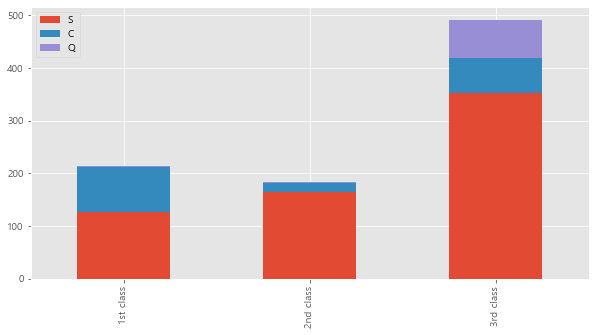

In [63]:
Pclass1 = titanic_df[titanic_df['Pclass']==1]['Embarked'].value_counts()
Pclass2 = titanic_df[titanic_df['Pclass']==2]['Embarked'].value_counts()
Pclass3 = titanic_df[titanic_df['Pclass']==3]['Embarked'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']

df.plot(kind='bar',stacked=True, figsize=(10,5))

In [64]:
# 결측치가 2개 뿐이므로 class 마다 가장 많은 비율을 갖고 있는 S 로 채워넣는다.

titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')
titanic_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,3
1,1,1,1,38.0,1,0,71.2833,C,4
2,1,3,1,26.0,0,0,7.9250,S,2


In [65]:
mapping_data ={"S":0, "Q":1, "C":2}
titanic_df["Embarked"] = titanic_df["Embarked"].map(mapping_data)
titanic_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,0,3
1,1,1,1,38.0,1,0,71.2833,2,4
2,1,3,1,26.0,0,0,7.9250,0,2


## 연속적 데이터 분석 및 시각화(나이, 요금)

In [51]:
def draw_facetgrid(feature):
    facet = sns.FacetGrid(titanic_df, hue="Survived", aspect=5) # Multi-plot grid for plotting conditional relationships.
    facet.map(sns.kdeplot, feature, shade=True)
    facet.set(xlim=(0, titanic_df[feature].max()))
    
    facet.add_legend() 
    plt.show()

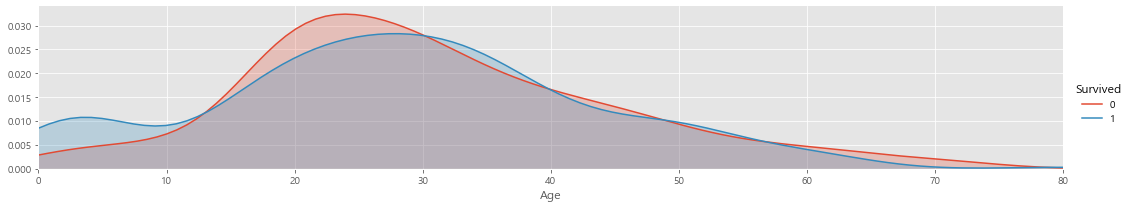

In [52]:
draw_facetgrid("Age")

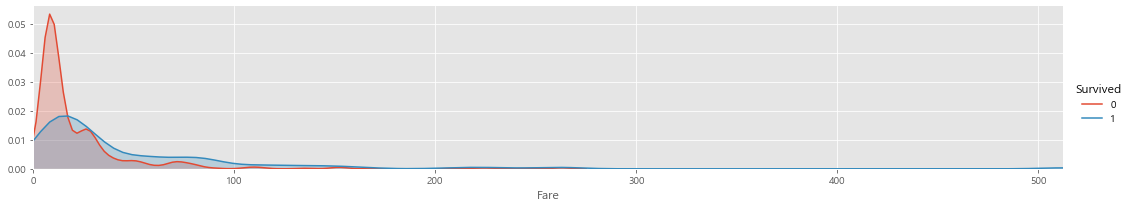

In [53]:
draw_facetgrid("Fare")

In [66]:
# 요금 전처리
titanic_df["Fareband"] = pd.cut(titanic_df["Fare"], 5) # Bin values into discrete intervals.
titanic_df[['Fareband','Survived']].groupby('Fareband').mean().sort_values(by='Survived', ascending=False)

,Survived
Fareband,
"(409.863, 512.329]",1.000000
"(102.466, 204.932]",0.757576
"(204.932, 307.398]",0.647059
"(-0.512, 102.466]",0.361575
"(307.398, 409.863]",NaN


In [67]:
del titanic_df['Fareband']

titanic_df.loc[ titanic_df['Fare'] <= 102, 'Fare'] = 0,
titanic_df.loc[(titanic_df['Fare'] > 102) & (titanic_df['Fare'] <= 204), 'Fare'] = 1,
titanic_df.loc[(titanic_df['Fare'] > 204) & (titanic_df['Fare'] <= 307), 'Fare'] = 2,
titanic_df.loc[ titanic_df['Fare'] > 307, 'Fare'] = 4

titanic_df['Fare'].value_counts()

0.0    838
1.0     33
2.0     17
4.0      3
Name: Fare, dtype: int64

In [54]:
# ticket 번호에서 패턴이 확인되지 않음
del titanic_df['Ticket'] 

## 이름 칼럼 분석

In [55]:
titanic_df['Title'] = titanic_df['Name'].str.extract('([A-Za-z]+)\.', expand=False)
titanic_df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Ms            1
Jonkheer      1
Countess      1
Mme           1
Don           1
Capt          1
Sir           1
Lady          1
Name: Title, dtype: int64

In [56]:
rare_title = []
for title in set(titanic_df['Title']):
    if list(titanic_df['Title']).count(title) < 10:
        rare_title.append(title)

titanic_df['Title'] = titanic_df['Title'].replace('Mlle', 'Miss') # Mademoiselle
titanic_df['Title'] = titanic_df['Title'].replace('Ms', 'Miss') 
titanic_df['Title'] = titanic_df['Title'].replace('Mme', 'Mrs') # Madame
titanic_df['Title'] = titanic_df['Title'].replace(rare_title, 'Rare')

titanic_df[['Title','Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [57]:
titanic_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,Rare
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,Miss
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,Mr


In [60]:
del titanic_df['Name'] # 호칭만 남김

In [61]:
# Str(Category/Factor) -> Int

title_mapping = {"Master":1, "Miss":2, "Mr":3, "Mrs":4, "Rare":5 }

titanic_df['Title'] = titanic_df['Title'].map(title_mapping)
titanic_df['Title'] = titanic_df['Title'].fillna(0)
titanic_df['Title'].astype(int)

titanic_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,3
1,1,1,female,38.0,1,0,71.2833,C,4
2,1,3,female,26.0,0,0,7.9250,S,2


## 나이 칼럼 전처리

In [73]:
# 중위값으로 결측치를 채워넣음

titanic_df["Age"].fillna(titanic_df.groupby("Title")["Age"].transform("median"), inplace=True)
titanic_df.head(3)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,isAlone
0,0,3,0,22.0,0.0,0,3,0.4,0
1,1,1,1,38.0,0.0,2,4,0.4,0
2,1,3,1,26.0,0.0,0,2,0.0,1


In [74]:
# Categorizing

titanic_df['AgeBand'] = pd.cut(titanic_df['Age'], 5)
titanic_df[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.548077
1,"(16.336, 32.252]",0.327345
2,"(32.252, 48.168]",0.439024
3,"(48.168, 64.084]",0.428571
4,"(64.084, 80.0]",0.090909


In [75]:
del titanic_df['AgeBand']

titanic_df.loc[ titanic_df['Age'] <= 16, 'Age'] = 0,
titanic_df.loc[(titanic_df['Age'] > 16) & (titanic_df['Age'] <= 32), 'Age'] = 1,
titanic_df.loc[(titanic_df['Age'] > 32) & (titanic_df['Age'] <= 48), 'Age'] = 2,
titanic_df.loc[(titanic_df['Age'] > 48) & (titanic_df['Age'] <= 64), 'Age'] = 3,
titanic_df.loc[ titanic_df['Age'] > 64, 'Age'] = 4

titanic_df.head(3)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,isAlone
0,0,3,0,1.0,0.0,0,3,0.4,0
1,1,1,1,2.0,0.0,2,4,0.4,0
2,1,3,1,1.0,0.0,0,2,0.0,1


In [77]:
target = titanic_df['Survived'].copy()
data = titanic_df.copy()
del data['Survived']

<br>

# 모델링

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

C:\Users\bruce0809\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\bruce0809\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\bruce0809\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [83]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
scoring ='accuracy'

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   Fare        891 non-null    float64
 4   Embarked    891 non-null    int64  
 5   Title       891 non-null    int64  
 6   FamilySize  891 non-null    float64
 7   isAlone     891 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [81]:
data.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,isAlone
0,3,0,1.0,0.0,0,3,0.4,0
1,1,1,2.0,0.0,2,4,0.4,0
2,3,1,1.0,0.0,0,2,0.0,1
3,1,1,2.0,0.0,0,4,0.4,0
4,3,0,2.0,0.0,0,3,0.0,1


In [82]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [88]:
clf = RandomForestClassifier(n_estimators=200)

score = cross_val_score(clf, titanic_data, titanic_target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print(round(np.mean(score)*100, 2))

[0.83333333 0.79775281 0.82022472 0.82022472 0.84269663 0.75280899
 0.83146067 0.80898876 0.80898876 0.78651685]
81.03


In [86]:
model = RandomForestClassifier(n_estimators=200)
model.fit(titanic_data, titanic_target)

# 평가예측
score = model.score(x_test, y_test)
print("Score : ",score)

y_predict = model.predict(test_df)
#print("정답률 : ", accuracy_score(y_test, y_predict))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [87]:
score = cross_val_score(model, titanic_data, titanic_target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print(round(np.mean(score)*100, 2))

[0.83333333 0.79775281 0.82022472 0.80898876 0.83146067 0.76404494
 0.83146067 0.80898876 0.80898876 0.80898876]
81.14


C:\Users\bruce0809\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bruce0809\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


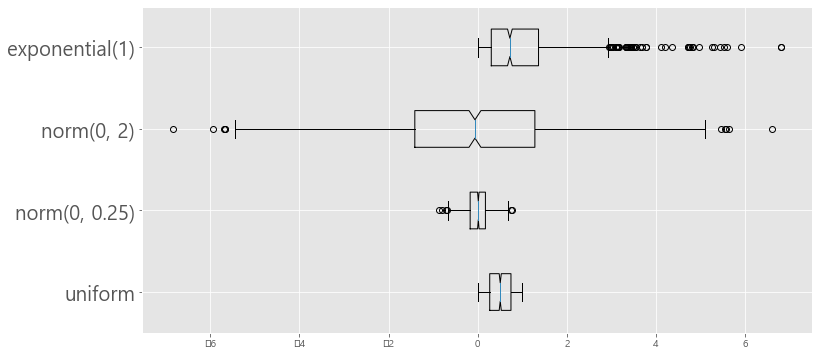

In [92]:
## boxplot 해보기
import numpy as np 
plt.figure(figsize=(12, 6))
sample_size = 1000
dist_dict = {
    "uniform":[np.random.uniform() for i in range(0, sample_size)], 
    "norm({}, {})".format(0, 0.25): [np.random.normal(0, 0.25) for i in range(0, sample_size)], 
    "norm({}, {})".format(0, 2): [np.random.normal(0,2) for i in range(0, sample_size)], 
    "exponential({})".format(1): [np.random.exponential(1) for i in range(0, sample_size)], 
}

plt.boxplot(
    list(dist_dict.values()),
    vert=False, # make the plot vertical 
    notch=True, # if it is False, it will be box
    whis=1.5
           )
plt.gca().set_yticklabels(dist_dict.keys(),
                          rotation=0, fontsize=20)
# plt.savefig('../../assets/images/markdown_img/boxplot_201805161556.svg')
plt.show()

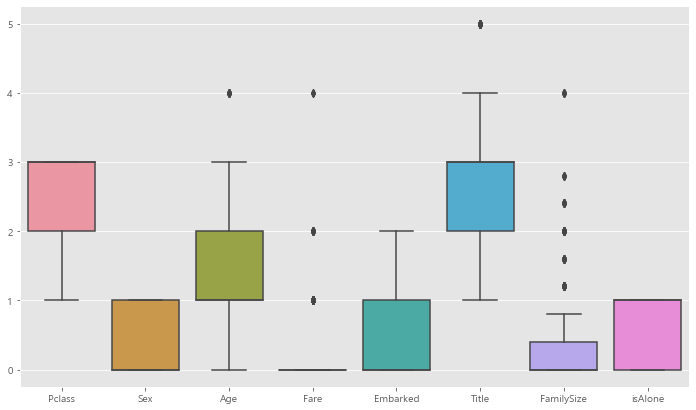

In [99]:
fig, ax = plt.subplots(figsize=(12,7))
sns.boxplot(data=titanic_data)